In [1]:
import sys
sys.path.append('../../')
import numpy as np
import pylab as plt
import time

In [2]:
from gunnar.core import Device, Array

In [3]:
devices = Device.getDevices()
print([k for k in devices])

['Intel(R) Gen9 HD Graphics NEO', 'pthread-Intel(R) Core(TM) i3-7100U CPU @ 2.40GHz']


In [4]:
gpu = Device([devices['Intel(R) Gen9 HD Graphics NEO']])

In [5]:
def timemmul(sizes):
    A = np.random.randn(sizes[0], sizes[1]).astype(np.float32)
    B = np.random.randn(sizes[1], sizes[0]).astype(np.float32)
    clA = gpu.array(A)
    clB = gpu.array(B)
    t1 = time.time()
    clC = clB @ clA.transpose()
    cl_time = time.time() - t1
    C = clC.to_cpu()
    t1 = time.time()
    R = np.matmul(A, B)
    cpu_time = time.time() - t1
    score = np.linalg.norm(R - C)
    return cl_time, cpu_time, score

In [6]:
from tqdm import tqdm
sizes = [5, 10, 100, 500, 1000, 2000, 3000, 4000]
cl_times = np.zeros(len(sizes))
cpu_times = np.zeros(len(sizes))
scores = np.zeros(len(sizes))
for i, s in tqdm(enumerate(sizes), total=len(sizes)):
    cl_times[i], cpu_times[i], scores[i] = timemmul((s, s))

100%|██████████| 8/8 [00:10<00:00,  1.25s/it]


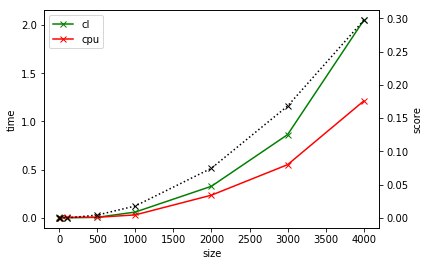

In [7]:
# DTYPE = np.float32
# TSM = 64
# TSN = TSM
# TSK = 8
# WPTM = 4
# WPTN = 4
plt.plot(sizes, cl_times, 'gx-', label='cl')
plt.plot(sizes, cpu_times, 'rx-', label='cpu')
plt.legend()
plt.xlabel('size')
plt.ylabel('time')
plt.twinx()
plt.plot(sizes, scores, 'kx:')
plt.ylabel('score')
plt.show()

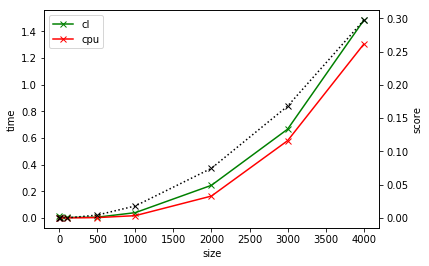

In [7]:
# DTYPE = np.float32
# TSM = 128
# TSN = TSM
# TSK = 16
# WPTM = 8
# WPTN = 8
plt.plot(sizes, cl_times, 'gx-', label='cl')
plt.plot(sizes, cpu_times, 'rx-', label='cpu')
plt.legend()
plt.xlabel('size')
plt.ylabel('time')
plt.twinx()
plt.plot(sizes, scores, 'kx:')
plt.ylabel('score')
plt.show()